In [1]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}


In [2]:
region, year = 'Austin', 2014
df, dfc = create_matrix_single_region(region, year)
start, stop = 1, 13
energy_cols = np.array([['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

static_cols = ['area', 'total_occupants', 'num_rooms']
static_df = df[static_cols]
static_df = static_df.div(static_df.max())
weather_values = np.array(dds[2014]['Austin'][start - 1:stop - 1]).reshape(-1, 1)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt


### Appliance weather correlation

In [5]:
corr={}
p_val ={}
from scipy.stats import pearsonr
for fun in ['median', 'mean']:
    corr[fun] = {}
    p_val[fun] = {}
    for appliance in APPLIANCES_ORDER:
        if fun =='mean':
            mean_df = df[['%s_%d' %(appliance, month) for month in range(1, 13)]].mean()
        else:
            mean_df = df[['%s_%d' %(appliance, month) for month in range(1, 13)]].median()
        mean_df.index = range(12)
        corr[fun][appliance] = mean_df.corr(pd.DataFrame(weather_values).squeeze())
        p_val[fun][appliance] = pearsonr(mean_df, pd.DataFrame(weather_values).squeeze())[1]

In [6]:
pd.DataFrame(corr)

,mean,median
aggregate,0.944872,0.945831
dw,-0.682062,-0.637915
fridge,0.864462,0.863211
hvac,0.973847,0.975584
mw,-0.891399,-0.862396
oven,-0.715466,-0.714693
wm,-0.705752,-0.381252


In [11]:
from plot_functions import *

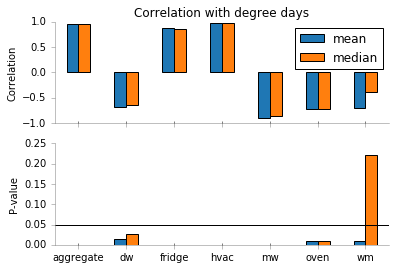

In [45]:
fig, ax = plt.subplots(nrows=2, sharex=True)
pd.DataFrame(corr).plot(kind='bar', rot=0, color=tableau20blind[::2], ax=ax[0])
ax[0].set_title("Correlation with degree days")
ax[0].set_ylabel("Correlation")
format_axes(ax[0])
pd.DataFrame(p_val).plot(kind='bar',rot=0, color=tableau20blind[::2], ax=ax[1], legend=False)
plt.ylabel("P-value")
plt.axhline(0.05, color='k')
format_axes(plt.gca())

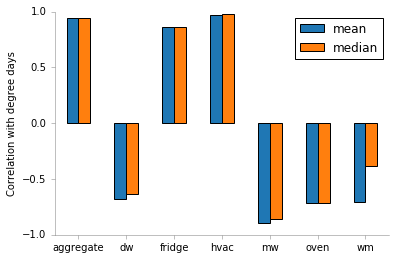

In [14]:
pd.DataFrame(corr).plot(kind='bar',rot=0, color=tableau20blind[::2])
plt.ylabel("Correlation with degree days")
format_axes(plt.gca())

fridge


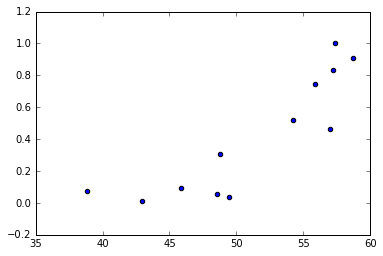

In [7]:
plt.scatter(mean_df, weather_values)
print appliance

In [33]:
def plot_corr(static):
    appliance_static_corr= {}
    appliance_static_p_val= {}
    for appliance in APPLIANCES_ORDER:
        appliance_static_corr[appliance] = {}
        appliance_static_p_val[appliance] = {}
        for month in range(1, 13):
            appliance_static_corr[appliance][month] = df[['%s_%d' %(appliance, month),static]].corr().values[0, 1]
            t = df[['%s_%d' %(appliance, month),static]].dropna()
            appliance_static_p_val[appliance][month] = pearsonr(t['%s_%d' %(appliance, month)], t[static])[1]
    fig, ax = plt.subplots(nrows=2, sharex=True)
    pd.DataFrame(appliance_static_corr).T.plot(kind='bar', legend=0, rot=0, colors='k',alpha=0.3, ax=ax[0])
    pd.DataFrame(appliance_static_p_val).T.plot(kind='bar', legend=0, rot=0, colors='k',alpha=0.3, ax=ax[1])
    plt.axhline(0.05, color='k')
    ax[0].set_title("Correlation with %s" %(static))
    ax[0].set_ylabel("Correlation")
    ax[1].set_ylabel("P-value")
    format_axes(ax[0])
    format_axes(ax[1])


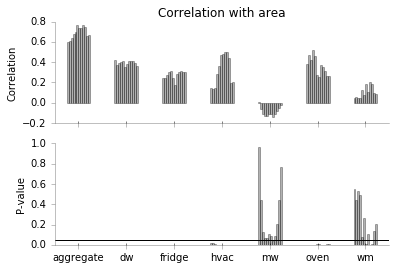

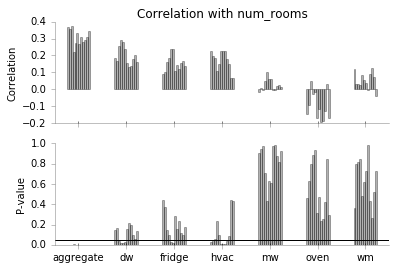

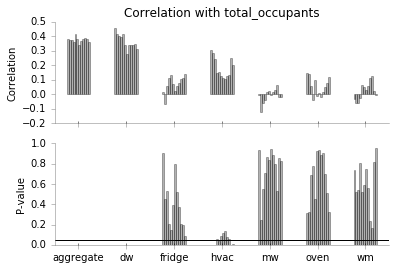

In [34]:

plot_corr('area')
plot_corr('num_rooms')
plot_corr('total_occupants')

In [40]:
appliance='mw'
a = df[['%s_%d' %(appliance, month) for month in range(1, 13)]].describe().median()
a.index = range(1, 13)
a.corr(pd.DataFrame(weather_values).squeeze())

-0.82903956753331465

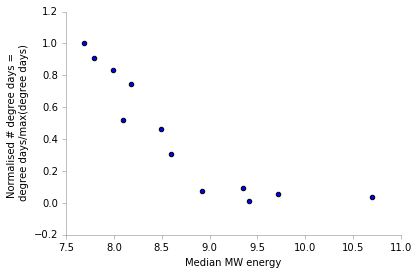

In [49]:
plt.scatter(a, weather_values)
plt.xlabel("Median MW energy")
plt.ylabel("Normalised # degree days = \n degree days/max(degree days)")
format_axes(plt.gca())

IndexError: tuple index out of range